In [118]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.formula.api as smf
# import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [103]:
# load raw data
data = pd.read_stata('data/dataset.dta')

In [104]:
# select variable out
df = data[['vote_trump','age','hhold_size','feminists','syrian','support_wall','deny_syrians','immigrant_level','imm_level_high','illegal_imm','imm_harm']].dropna()

In [105]:
# replace 90. Age 90 or older to 90
df.age = df.age.replace('90. Age 90 or older', 90)

In [106]:
df_data = df

In [108]:
# convert to dummy variables
df_data.vote_trump = df_data.vote_trump.map({'Yes': 1, 'No': 0})
df_data.support_wall = df_data.support_wall.map({'Yes': 1, 'No': 0})
df_data.deny_syrians = df_data.deny_syrians.map({'Yes': 1, 'No': 0})
df_data.imm_level_high = df_data.imm_level_high.map({'Yes': 1, 'No': 0})

In [109]:
df_data.syrian = df_data.syrian.map({"1. Favor a great deal": 6, 
                                       "2. Favor a moderate amount": 5,
                                       "3. Favor a little": 4,
                                       "4. Neither favor nor oppose": 3,
                                       "5. Oppose a little": 2,
                                       "6. Oppose a moderate amount": 1,
                                       "7. Oppose a great deal": 0})

In [110]:
df_data.immigrant_level = df_data.immigrant_level.map({"1. Increased a lot": 4,
                                                "2. Increased a little": 3,
                                                "3. Left the same as it is now": 2,
                                                "4. Decreased a little": 1,
                                                "5. Decreased a lot": 0})

In [111]:
df_data.imm_harm = df_data.imm_harm.map({"Disagree strongly": 4,
                                       "Disagree somewhat": 3,
                                       "Neither agree nor disagree": 2,
                                       "Agree somewhat": 1,
                                       "Agree strongly": 0})

In [113]:
df_data

,vote_trump,age,hhold_size,feminists,syrian,support_wall,deny_syrians,immigrant_level,imm_level_high,illegal_imm,imm_harm
0,1,29.0,4.0,50.0,0,1,1,1,0,0.0,1
1,1,26.0,3.0,50.0,0,1,1,0,1,0.0,4
4,0,38.0,4.0,70.0,3,0,0,2,0,50.0,2
5,0,58.0,2.0,50.0,1,0,1,2,0,50.0,2
6,1,56.0,2.0,40.0,0,1,1,1,0,40.0,3
...,...,...,...,...,...,...,...,...,...,...,...
3532,1,52.0,5.0,50.0,0,1,1,0,1,0.0,0
3533,0,21.0,6.0,50.0,3,0,0,3,0,50.0,4
3534,0,37.0,3.0,86.0,3,0,0,1,0,30.0,2
3535,1,82.0,2.0,16.0,3,0,0,0,1,0.0,1


In [115]:
mod = smf.ols(formula='vote_trump ~ age + hhold_size + feminists + syrian + support_wall + deny_syrians + immigrant_level + imm_level_high + illegal_imm + imm_harm',
             data = df_data)
mod_result = mod.fit()

In [116]:
mod_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             vote_trump   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     258.9
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:44:24   Log-Likelihood:                -875.91
No. Observations:                2452   AIC:                             1774.
Df Residuals:                    2441   BIC:                             1838.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6634      0.051     13.131      0.000       0.564       0.763
age                 0.0012      0.000      2.823      0.005       0.000       0.002
hhold_size          0.0032      0.005      0.641      0.522      -0.007       0.013
feminists          -0.0039      0.000    -12.350      0.000      -0.005      -0.003
syrian             -0.0324      0.008     -3.984      0.000      -0.048      -0.016
support_wall        0.3158      0.019     16.842      0.000       0.279       0.353
deny_syrians        0.1107      0.031      3.621      0.000       0.051       0.171
immigrant_level    -0.0148      0.011     -1.333      0.183      -0.037       0.007
imm_level_high     -0.0014      0.026     -0.055      0.956      -0.053       0.050
illegal_imm        -0.0015      0.000     -4.435      0.000      -0.002      -0.001
imm_harm           -0.0247      0.007     -3.308      0.001      -0.039      -0.010
==============================================================================
Omnibus:                        6.739   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                7.951
Skew:                           0.035   Prob(JB):                       0.0188
Kurtosis:                       3.270   Cond. No.                         711.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# test how linear mode predict

In [117]:
X = df_data[['age','hhold_size','feminists','syrian','support_wall','deny_syrians','immigrant_level','imm_level_high','illegal_imm','imm_harm']]
y = df_data.vote_trump

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
# predict
y_predict = linearReg.predict(X_test)
print('Linear model prediction score: {:.2f}'.format(linearReg.score(X_test, y_test)))

Linear model prediction score: 0.52


In [132]:
linear_test = pd.DataFrame(
    data= {
        'predict': y_predict,
        'vote': y_test
    }
)

In [133]:
linear_test

,predict,vote
215,0.881821,0
1184,0.086721,0
48,0.560016,0
1334,0.890270,1
3164,0.246799,0
...,...,...
1931,0.940136,1
2385,0.900989,1
285,0.932966,1
14,0.605754,1


# run Logit mod

In [134]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [135]:
# predict 
y_log_predict = logReg.predict(X_test)
print('Logit model predict score: {:.2f}'.format(logReg.score(X_test, y_test)))

Logit model predict score: 0.83


In [136]:
logit_test = pd.DataFrame(
    data = {
        'vote': y_test,
        'preidiction': y_log_predict
    }
)

In [137]:
logit_test

,vote,preidiction
215,0,1
1184,0,0
48,0,1
1334,1,1
3164,0,0
...,...,...
1931,1,1
2385,1,1
285,1,1
14,1,1


In [138]:
#confusion_matrix
confusion_matrix(y_test, y_log_predict)

array([[120,  17],
       [ 26,  83]])

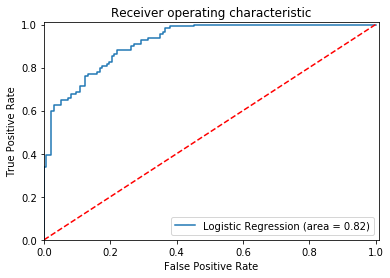

In [139]:
# print ROC curve
roc = roc_auc_score(y_test, y_log_predict)
fpr, tpr, threshholds = roc_curve(y_test, logReg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")